# Неделя 4: Pandas
*   [Полный User Guide по библиотеке pandas](https://pandas.pydata.org/docs/user_guide/index.html)
*   [Куча полезных рецептов и хороших практик](https://pandas.pydata.org/docs/user_guide/cookbook.html)

Данные iris.csv можно скачать отсюда https://drive.google.com/file/d/1fjyopp9FZ-g6KIsIE8vPX2r62A43h2XI/view?usp=sharing

In [1]:
import pandas as pd
import numpy as np


# Создание объекта

В `pandas` существует два основных объекта: `pandas Series` и `pandas DataFrame`. Первая это по сути абстракция над одномерным массивом данных с дополнительными метаданными, а вторая абстракция это по сути "таблица", состоящая из наборов `pandas Series`.

## `pd.Series`

Начнем с `pd.Series`. 

Так же, как и для `numpy`, массива мы можем задать тип данных. Доступны все те же типы данных, что и в `numpy` + есть возможность конвертировать одни типы данных в другие с помощью `astype` + можно указывать [свои функции](https://pbpython.com/pandas_dtypes.html) для преобразования.

In [2]:
# teacher
s = pd.Series([1,2,3], dtype=np.int32, name='numbers')
s

0    1
1    2
2    3
Name: numbers, dtype: int32

Обратите внимание на колонку слева, это индекс, и если не указано обратное, создается автоматически. Индексы мы будем встречать как для `pd.Series`, так и для `pd.DataFrame`. Что он дает? Аналогия здесь такая же, что с телефонным справочником. Индексы позволяют более логично категоризовать информацию, а также более оптимально совершать некоторые операции над сериями `pd.Series` и датафреймами `pd.DataFrame`. Вкратце, можно отметить, что индексы:
1. Идентифицируют данные (т.е. предоставляют метаданные) с помощью известных индикаторов, важных для анализа, визуализации и отображения в интерактивной консоли
2. Включают автоматическое и явное выравнивание данных.
3. Позволяют интуитивно получать и настраивать подмножества набора данных.

Помимо этого обратите внимание, что у серии также есть имя. Это полезно, когда нам нужно вставить новую колонку в `DataFrame` без явного указания имени.

Следующим образом мы можем задать произвольный индекс, теперь наши записи идентифицируют буквы `a b c`

In [3]:
# teacher
s = pd.Series([1,2,3], dtype=np.int32, name='numbers', index=['a', 'b', 'c'])
s

a    1
b    2
c    3
Name: numbers, dtype: int32

Помимо индекса (свойства `s.index`) также сохраняется сквозная целочисленная индексация.

Ниже выборка просто по целочисленному индексу (сквозному), как будто мы работаем с обычным списком.

In [5]:
s[0]

1

Метод доступа ``.loc` позволяет делать выборку именно по индексу.

Обратите внимание, что здесь используются именно квадратные скобки. Скорее всего так сделано, чтобы такая выборка была похожа на выборку из обычного списка.

In [7]:
s.loc['b']

2

Посмотреть отдельно на индекс можно с помощью свойства `.index`

In [8]:
s.index

Index(['a', 'b', 'c'], dtype='object')

## `pd.DataFrame`

Создадим pandas `DataFrame` из случайной `numpy` матрицы

In [50]:
# teacher
m = np.random.rand(5, 3)
df = pd.DataFrame(m)
df

,0,1,2
0,0.260945,0.875980,0.894113
1,0.636574,0.457573,0.471042
2,0.242228,0.940929,0.281719
3,0.386596,0.008647,0.729639
4,0.179962,0.458945,0.047591


Мы видим строковый индекс, который был создан автоматически, а также колоночный (или просто колонки), который также был задан автоматически. У нас получился не совсем привычный вид таблицы, давайте зададим колонкам более понятные имена.

In [53]:
# teacher
df = pd.DataFrame(m, columns=['first', 'second', 'third'])
df

,first,second,third
0,0.260945,0.875980,0.894113
1,0.636574,0.457573,0.471042
2,0.242228,0.940929,0.281719
3,0.386596,0.008647,0.729639
4,0.179962,0.458945,0.047591


В pandas DataFrame выборка квадратными скобками происходит по колонкам

In [13]:
# teacher
df['first']

0    0.374661
1    0.581857
2    0.289572
3    0.115574
4    0.761868
Name: first, dtype: float64

In [14]:
df[0] # такой колонки нет, будет ошибка

KeyError: 0

Но ВНЕЗАПНО, если мы попробуем применить слайсинг, как в обычных массивах `numpy` или списках, выборка будет происходить по строкам. Это та особенность, которую мы вынуждены просто запомнить. Выборка при этом происходит по целочисленной сквозной индексации `(0,1,2,3,4,...)`.

In [15]:
# teacher
df[:2]

,first,second,third
0,0.374661,0.155857,0.919583
1,0.581857,0.375406,0.478486


Есть удобный способ инициализировать новый DataFrame с помощью словаря. Ключи станут названиями колонок, а значения - столбцами.

In [17]:
# pd.DataFrame через словарь
# teacher
d = {
    'name': ['Dmitry', 'Alexey', 'Vladimir', 'Elena'],
    'age': [24, 25, 30, 40]
}
pd.DataFrame(d)

,name,age
0,Dmitry,24
1,Alexey,25
2,Vladimir,30
3,Elena,40


# Просмотр 

## Просмотр таблицы

По умолчанию colab notebook (или jupyter notebook) будет "обрезать" отображение табличек, так как если там много строк, они могут занимать много места и привести ваш браузер в замешательство, а компьютер в полный аут.

In [18]:
df

,first,second,third
0,0.374661,0.155857,0.919583
1,0.581857,0.375406,0.478486
2,0.289572,0.715694,0.529798
3,0.115574,0.706677,0.315529
4,0.761868,0.799119,0.909086


### `display.max_rows`

Так будет пропущено несколько строчек в целях экономии места. Количество отображаемых строк можно указать в ручном режиме, использя метод `pd.set_option("display.max_rows", n)`

In [263]:
pd.set_option("display.max_rows", 12)
pd.DataFrame(np.random.rand(100,2))

,0,1
0,0.736717,0.422905
1,0.172856,0.608700
2,0.505288,0.998193
3,0.972359,0.885389
4,0.312424,0.233798
...,...,...
95,0.453450,0.080576
96,0.248102,0.532040
97,0.060049,0.366778
98,0.123386,0.545162


### `.head()`

Впрочем, вряд ли вам понадобится отсматривать, скажем, 100000 строк какой-нибудь таблицы вручную. Как правило, нам достаточно посмотреть первые несколько строк таблицы, чтобы понять, что там находится и правильно ли мы прочитали нашу таблицу из файла.

Покажем первые две строки датафрейма, по умолчанию `head()` отображает 5 первых строк.

In [21]:
# teacher
df.head(2)

,first,second,third
0,0.374661,0.155857,0.919583
1,0.581857,0.375406,0.478486


### `.tail()`

Последние две строчки с конца:

In [27]:
# teacher
df.tail(2)

,first,second,third
3,0.900219,0.997853,0.983675
4,0.752780,0.669283,0.304397


## Просмотр индексов

Мы можем отдельно посмотреть строковый индекс и колонки с помощью соответствующих свойств объекта

In [23]:
# teacher
df.index

RangeIndex(start=0, stop=5, step=1)

In [25]:
df.index[2]

2

In [26]:
# teacher
df.columns

Index(['first', 'second', 'third'], dtype='object')

In [27]:
# teacher
df.columns[1]

'second'

## Форма таблицы

Узнать форму нашей таблицы.

In [28]:
# teacher
df.shape

(5, 3)

Количество строк:

In [29]:
# teacher
df.shape[0]

5

Количество столбцов:

In [31]:
# teacher
df.shape[1]

3

## Типы данных

Посмотреть типы данных

### `.dtypes`

In [32]:
# teacher
df.dtypes

first     float64
second    float64
third     float64
dtype: object

### `.astype()`

И менять их с помощью метода `astype()`. Обратите внимание, что мы можем передать целый словарь, в котором ключи это названия колонок, а значения по ключу это тип данных к которому мы хотим преобразовать соответствующую колонку.

In [54]:
# teacher
df.astype({'first': np.float32}).dtypes

first     float32
second    float64
third     float64
dtype: object

### `.to_numpy()`

Мы можем отказаться от всех метаданных и перейти к numpy матрице, чтобы работать с ней с помощью методов из библиотеки numpy

In [36]:
df.to_numpy()

array([[0.37466083, 0.15585666, 0.91958303],
       [0.58185678, 0.37540555, 0.4784863 ],
       [0.28957234, 0.7156939 , 0.52979841],
       [0.11557433, 0.70667684, 0.31552911],
       [0.76186762, 0.7991189 , 0.90908567]])

## Содержание таблицы

### `.describe()`

Крайне полезен метод .describe(), который выводит нам дескриптивную статистику по нашему датафрейму.

In [37]:
# teacher
df.describe()

,first,second,third
count,5.000000,5.000000,5.000000
mean,0.424706,0.550550,0.630497
...,...,...,...
75%,0.581857,0.715694,0.909086
max,0.761868,0.799119,0.919583


### `.info()`

А в методе `info` мы можем сразу проверить наличие пропусков (графа `Non-Null Count`), а также посмотреть, какой объем памяти занимает наша табличка (чем меньше, тем, конечно, лучше).

In [38]:
# teacher
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   first   5 non-null      float64
 1   second  5 non-null      float64
 2   third   5 non-null      float64
dtypes: float64(3)
memory usage: 248.0 bytes


In [41]:
# teacher
df.astype({'first': np.float32}).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   first   5 non-null      float32
 1   second  5 non-null      float64
 2   third   5 non-null      float64
dtypes: float32(1), float64(2)
memory usage: 228.0 bytes


In [58]:
# teacher
df.astype(np.float32).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   first   5 non-null      float32
 1   second  5 non-null      float32
 2   third   5 non-null      float32
dtypes: float32(3)
memory usage: 188.0 bytes


In [42]:
20 / 248

0.08064516129032258

## Изменение вида таблицы

По большому счету колонки - это тот же индекс, только по горизонтальной оси (`axis = 1`). Строковый и столбцовый индексы могут заменять друг друга, давайте продемонстрируем это с помощью операции транспонирования.

Кстати, ниже напоминание об осях из прошлой лекции.

![axes](https://railsware.com/blog/wp-content/uploads/2018/11/data-frame-axes.png)

![axes](https://i.stack.imgur.com/FzimB.png)

### Транспонирование `.T`

In [59]:
df.T

,0,1,2,3,4
first,0.260945,0.636574,0.242228,0.386596,0.179962
second,0.875980,0.457573,0.940929,0.008647,0.458945
third,0.894113,0.471042,0.281719,0.729639,0.047591


### `.sort_values()`

Мы можем сортировать строки таблицы по значениям колонок. Обратите внимание, что 

> индекс остался прежним.

In [61]:
# ascending=False по убыванию
# teacher
df.sort_values('first', ascending=False) # ascending=False -- по убыванию

,first,second,third
1,0.636574,0.457573,0.471042
3,0.386596,0.008647,0.729639
0,0.260945,0.875980,0.894113
2,0.242228,0.940929,0.281719
4,0.179962,0.458945,0.047591


### `.sort_index()`

А можем сортировать именно индекс.

In [63]:
# teacher
df.T.sort_index(axis=0, ascending=False)

,0,1,2,3,4
third,0.894113,0.471042,0.281719,0.729639,0.047591
second,0.875980,0.457573,0.940929,0.008647,0.458945
first,0.260945,0.636574,0.242228,0.386596,0.179962


In [64]:
df.T.sort_index(axis=1, ascending=False)

,4,3,2,1,0
first,0.179962,0.386596,0.242228,0.636574,0.260945
second,0.458945,0.008647,0.940929,0.457573,0.875980
third,0.047591,0.729639,0.281719,0.471042,0.894113


# Выборка

Подробная информация по выборкам данных представлена [тут](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html).

## Квадратные скобки
Как уже отмечалось выше, для датафреймов выборка происходит по столбцам.

In [65]:
# teacher
df['third']

0    0.894113
1    0.471042
2    0.281719
3    0.729639
4    0.047591
Name: third, dtype: float64

In [66]:
# teacher
df[['third', 'first']]

,third,first
0,0.894113,0.260945
1,0.471042,0.636574
2,0.281719,0.242228
3,0.729639,0.386596
4,0.047591,0.179962


Слайсинг по сквозному целочисленному индексу, как в массиве

In [69]:
# teacher
df[1:4]

,first,second,third
1,0.636574,0.457573,0.471042
2,0.242228,0.940929,0.281719
3,0.386596,0.008647,0.729639


## Выборка по метке (лейблу)

### `.set_index()`
Добавим новый столбец в нашу таблицу и сделаем его новым индексом с помощью метода `.set_index()`

In [70]:
df['new_index'] = pd.Series(['a', 'b', 'e', 'c', 'g'])
df

,first,second,third,new_index
0,0.260945,0.875980,0.894113,a
1,0.636574,0.457573,0.471042,b
2,0.242228,0.940929,0.281719,e
3,0.386596,0.008647,0.729639,c
4,0.179962,0.458945,0.047591,g


In [71]:
# teacher
df = df.set_index('new_index')
df

,first,second,third
new_index,,,
a,0.260945,0.875980,0.894113
b,0.636574,0.457573,0.471042
e,0.242228,0.940929,0.281719
c,0.386596,0.008647,0.729639
g,0.179962,0.458945,0.047591


### `.loc`

Теперь с помощью `.loc` мы можем производить навигацию по этому индексу

In [72]:
# teacher
df.loc['b']

first     0.636574
second    0.457573
third     0.471042
Name: b, dtype: float64

И даже использовать диапазоны (слайсы) по индексу

In [73]:
# teacher
df.loc['b':'c']

,first,second,third
new_index,,,
b,0.636574,0.457573,0.471042
e,0.242228,0.940929,0.281719
c,0.386596,0.008647,0.729639


Через запятую мы можем указать также и фильтр по столбцам

In [74]:
# teacher
df.loc['b':'c', ['second', 'third']]

,second,third
new_index,,
b,0.457573,0.471042
e,0.940929,0.281719
c,0.008647,0.729639


## Выборка по позиции в таблице

### `.iloc`
Сохраняется сквозная целочисленная индексация, и она доступна с помощью метода `.iloc`. Скобки также квадратные

In [75]:
df

,first,second,third
new_index,,,
a,0.260945,0.875980,0.894113
b,0.636574,0.457573,0.471042
e,0.242228,0.940929,0.281719
c,0.386596,0.008647,0.729639
g,0.179962,0.458945,0.047591


In [76]:
# teacher
df.iloc[1:3]

,first,second,third
new_index,,,
b,0.636574,0.457573,0.471042
e,0.242228,0.940929,0.281719


Происходит выборка именно по **номеру** строки и **номеру** столбца (начиная с нуля)

In [79]:
# teacher
df.iloc[1:3, [0, 2]]

,first,third
new_index,,
b,0.636574,0.471042
e,0.242228,0.281719


In [80]:
df.iloc[1:3][['first', 'third']]

,first,third
new_index,,
b,0.636574,0.471042
e,0.242228,0.281719


# Чтение и запись данных

## Чтение `pd.read_csv`

В pandas присутствует огромное кол-во возможностей для чтения записи данных.

Например, в методе `pd.read_csv` доступны специфичные опции для формата (например, разделитель колонок `sep`), но также можно, например, дополнить список значений, которые pandas по умолчанию считает пропусками, задав явно параметр `na_values`.

Более подробную информацию про чтение и запись данных можно найти [здесь](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html).

In [87]:
# teacher
iris = pd.read_csv('iris.csv', header='infer', sep=',')
iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
...,...,...,...,...,...
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


`pd.read_` - доступно очень большое кол-во форматов для чтения.

## Запись to_csv() и другие

`iris.to_`

Сохраняем в качестве первой строки список колонок, первой колонкой индекс НЕ пишем:

In [88]:
# teacher
iris.to_csv('iris_test.csv', header=True, index=False)

In [90]:
# !ls

In [94]:
pd.read_csv('iris_test.csv', header='infer')

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
...,...,...,...,...,...
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


# Практика

Загрузим набор данных `iris.csv` и потренируемся делать выборки на нем.

In [92]:
import numpy as np
import pandas as pd

iris = pd.read_csv('iris.csv', header='infer')
iris.head(5)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


## Задачи на выборку данных
1. выведите первые 4 строки и первые 2 столбца с помощью метода .iloc
2. выведите только колонки sepal.length и petal.length с помощью loc и/или квадратных скобок
3. сделайте индексом колонку variety с помощью метода .set_index(), и выберите с помощью .loc только вид 'Setosa'

In [103]:
# 1
iris.iloc[:4, :2]

,sepal.length,sepal.width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1


In [104]:
# 2
iris.loc[:, ['sepal.length', 'petal.length']]

,sepal.length,petal.length
0,5.1,1.4
1,4.9,1.4
...,...,...
148,6.2,5.4
149,5.9,5.1


In [105]:
# 2
iris[['sepal.length', 'petal.length']]

,sepal.length,petal.length
0,5.1,1.4
1,4.9,1.4
...,...,...
148,6.2,5.4
149,5.9,5.1


In [106]:
# 3
iris.set_index('variety').loc['Setosa']

,sepal.length,sepal.width,petal.length,petal.width
variety,,,,
Setosa,5.1,3.5,1.4,0.2
Setosa,4.9,3.0,1.4,0.2
...,...,...,...,...
Setosa,5.3,3.7,1.5,0.2
Setosa,5.0,3.3,1.4,0.2


# Выборка по маске

Так же, как и в numpy, присутствует возможность делать выборки по маске. Но здесь механизм несколько отличается. Если в numpy мы получали матрицу из `True` и `False` и каждому элементу было сопоставлено значение `True` (брать в выборку) или `False` (не брать в выборку), то в pandas маска - это `pandas Series` **с такой же индексацией**, что и исходный датафрейм или серия, состоящий из значений `True` или `False`. Т.е мы указываем какие строчки идут в результирующую выборку, а какие нет.

Получаем маску, в которой у каждого индекса (!!!) указано, оставлять его в наборе данных или нет

In [107]:
# teacher
(iris['sepal.length'] > 5.0) & (iris['sepal.width'] <= 3.0)

0      False
1      False
       ...  
148    False
149     True
Length: 150, dtype: bool

In [90]:
mask = (iris['sepal.length'] > 5.0) & (iris['sepal.width'] <= 3.0)
mask

0      False
1      False
2      False
3      False
4      False
       ...  
145     True
146     True
147     True
148    False
149     True
Length: 150, dtype: bool

In [108]:
sl_mask_lower_limit = iris['sepal.length'] > 5.0
sw_mask_upper_limit = iris['sepal.width'] <= 3.0
mask = sl_mask_lower_limit & sw_mask_upper_limit

In [92]:
mask

0      False
1      False
2      False
3      False
4      False
       ...  
145     True
146     True
147     True
148    False
149     True
Length: 150, dtype: bool

Конечно, мы можем выстраивать условия в логические цепочки

In [109]:
# teacher
iris[mask]

,sepal.length,sepal.width,petal.length,petal.width,variety
53,5.5,2.3,4.0,1.3,Versicolor
54,6.5,2.8,4.6,1.5,Versicolor
...,...,...,...,...,...
147,6.5,3.0,5.2,2.0,Virginica
149,5.9,3.0,5.1,1.8,Virginica


Мы можем даже перемешать значения, но выборка все равно останется той же за счет соответствия по индексу!

In [110]:
# teacher
iris.sort_values('sepal.length')[mask]

C:\Users\commi\AppData\Local\Temp\ipykernel_11200\2880064127.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  iris.sort_values('sepal.length')[mask]


,sepal.length,sepal.width,petal.length,petal.width,variety
98,5.1,2.5,3.0,1.1,Versicolor
59,5.2,2.7,3.9,1.4,Versicolor
...,...,...,...,...,...
118,7.7,2.6,6.9,2.3,Virginica
135,7.7,3.0,6.1,2.3,Virginica


Получим уникальные значения индексов в каждой выборке. Если множество ключей в первом случае совпадает со множеством во втором случае, то в обоих случаях мы сделали одинаковую выборку

In [112]:
set(iris[(iris['sepal.length'] > 5.0) & (iris['sepal.width'] <= 3.0)].index) \
 - set(iris.sort_values('sepal.length')[(iris['sepal.length'] > 5.0) & (iris['sepal.width'] <= 3.0)].index)

C:\Users\commi\AppData\Local\Temp\ipykernel_11200\242184057.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  - set(iris.sort_values('sepal.length')[(iris['sepal.length'] > 5.0) & (iris['sepal.width'] <= 3.0)].index)


set()

In [111]:
# teacher
set(iris[mask].index) - set(iris.sort_values('sepal.length')[mask].index)

C:\Users\commi\AppData\Local\Temp\ipykernel_11200\2843459138.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  set(iris[mask].index) - set(iris.sort_values('sepal.length')[mask].index)


set()

In [113]:
iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
...,...,...,...,...,...
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [114]:
mask

0      False
1      False
       ...  
148    False
149     True
Length: 150, dtype: bool

In [115]:
iris[mask]

,sepal.length,sepal.width,petal.length,petal.width,variety
53,5.5,2.3,4.0,1.3,Versicolor
54,6.5,2.8,4.6,1.5,Versicolor
...,...,...,...,...,...
147,6.5,3.0,5.2,2.0,Virginica
149,5.9,3.0,5.1,1.8,Virginica


## `.isin()`

Для того, чтобы сделать фильтрацию по значениям в колонке, используйте метод `.isin()`.

Проверка по множеству:

In [116]:
# teacher
iris[iris['variety'].isin(['Setosa', 'Virginica'])]

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
...,...,...,...,...,...
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


## `.query()`

In [117]:
iris.query("`variety` == 'Setosa'")

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
...,...,...,...,...,...
48,5.3,3.7,1.5,0.2,Setosa
49,5.0,3.3,1.4,0.2,Setosa


# Вставка значений

Вставку значений можно производить методами доступа `.loc` и `.iloc`, а также методом `.at`. Разница в том, что `.loc` и `.iloc` чуть более универсальны и позволяют изменить сразу целый диапазон, при этом важно соблюсти размерности вставляемых данных. `.at`, в свою очередь, дает нам точечную вставку "на место", и лучше подходит с точки зрения чтения кода.

In [119]:
df = pd.DataFrame(np.random.rand(6, 3), 
                  index=['a','b','c','d','e','f'], 
                  columns=['first', 'second', 'third'])
df

,first,second,third
a,0.291419,0.241441,0.041325
b,0.630655,0.487491,0.323864
...,...,...,...
e,0.987059,0.758400,0.309595
f,0.830975,0.592298,0.818742


## `.loc`

In [121]:
# teacher
df.loc['b', 'first'] = 1.0
df

,first,second,third
a,0.291419,0.241441,0.041325
b,1.000000,0.487491,0.323864
...,...,...,...
e,0.987059,0.758400,0.309595
f,0.830975,0.592298,0.818742


Вставка диапазона

In [123]:
# teacher
df.loc['a': 'c', 'first'] = [0.5, 1.5, 2.0]
df

,first,second,third
a,0.500000,0.241441,0.041325
b,1.500000,0.487491,0.323864
...,...,...,...
e,0.987059,0.758400,0.309595
f,0.830975,0.592298,0.818742


## `.at`

In [124]:
# teacher
df.at['e', 'second'] = 100
df

,first,second,third
a,0.500000,0.241441,0.041325
b,1.500000,0.487491,0.323864
...,...,...,...
e,0.987059,100.000000,0.309595
f,0.830975,0.592298,0.818742


## Другие способы 

In [129]:
s = pd.Series([99, 88, 77], index=['a', 'e', 'f'])
s

a    99
e    88
f    77
dtype: int64

In [130]:
df['third'] = s
df

,first,second,third
a,0.500000,0.241441,99.0
b,1.500000,0.487491,NaN
c,2.000000,0.385210,NaN
d,0.333480,0.872530,NaN
e,0.987059,100.000000,88.0
f,0.830975,0.592298,77.0


In [131]:
df['fourth'] = s
df

,first,second,third,fourth
a,0.500000,0.241441,99.0,99.0
b,1.500000,0.487491,NaN,NaN
c,2.000000,0.385210,NaN,NaN
d,0.333480,0.872530,NaN,NaN
e,0.987059,100.000000,88.0,88.0
f,0.830975,0.592298,77.0,77.0


In [156]:
s2 = pd.Series([200,300,400,500,11,22,33,44,55], index=['a', 'b', 'c', 'd', 'e', 'f', 'k', 'm', 's'])
s2

a    200
b    300
    ... 
m     44
s     55
Length: 9, dtype: int64

In [157]:
df

,first,second,third,fourth
a,0.500000,0.241441,99.0,99.0
b,1.500000,0.487491,NaN,NaN
...,...,...,...,...
e,0.987059,100.000000,88.0,88.0
f,0.830975,0.592298,77.0,77.0


In [158]:
df['third'] = s2
df

,first,second,third,fourth
a,0.500000,0.241441,200,99.0
b,1.500000,0.487491,300,NaN
...,...,...,...,...
e,0.987059,100.000000,11,88.0
f,0.830975,0.592298,22,77.0


In [159]:
s

a    99
e    88
f    77
dtype: int64

In [161]:
s.reindex(index=df.index)

a    99.0
b     NaN
     ... 
e    88.0
f    77.0
Length: 6, dtype: float64

In [162]:
df['five'] = s.reindex(index=df.index).fillna(df['second'])
df

,first,second,third,fourth,five
a,0.500000,0.241441,200,99.0,99.000000
b,1.500000,0.487491,300,NaN,0.487491
...,...,...,...,...,...
e,0.987059,100.000000,11,88.0,88.000000
f,0.830975,0.592298,22,77.0,77.000000


In [167]:
s = pd.Series([99, 88, 77])
s

0    99
1    88
2    77
dtype: int64

In [168]:
df['sixth'] = s
df

,first,second,third,fourth,five,sixth
a,0.500000,0.241441,200,99.0,99.000000,NaN
b,1.500000,0.487491,300,NaN,0.487491,NaN
...,...,...,...,...,...,...
e,0.987059,100.000000,11,88.0,88.000000,NaN
f,0.830975,0.592298,22,77.0,77.000000,NaN


# Пропущенные значения

По умолчанию не участвуют в вычислениях, и чаще всего на месте пропусков можно встретить значение `np.nan` (Not a Number), либо `None` (для нечисловых типов)

Сделаем специально несколько пропущенных значений:

In [171]:
df = df.astype({'third': np.float32})
df.at['e', 'second'] = np.nan
df.at['e', 'third'] = np.nan
df

,first,second,third,fourth,five,sixth
a,0.500000,0.241441,200.0,99.0,99.000000,NaN
b,1.500000,0.487491,300.0,NaN,0.487491,NaN
c,2.000000,0.385210,400.0,NaN,0.385210,NaN
d,0.333480,0.872530,500.0,NaN,0.872530,NaN
e,0.987059,NaN,NaN,88.0,88.000000,NaN
f,0.830975,0.592298,22.0,77.0,77.000000,NaN


## `.isna()`

Метод `.isna()` возвращает нам карту с пропусками. Пропуск там, где значение `True`.

In [172]:
# teacher
df.isna()

,first,second,third,fourth,five,sixth
a,False,False,False,False,False,True
b,False,False,False,True,False,True
c,False,False,False,True,False,True
d,False,False,False,True,False,True
e,False,True,True,False,False,True
f,False,False,False,False,False,True


In [173]:
df.shape

(6, 6)

## `.info()`

Напоминаю, что в принципе количественную информацию о пропусках можно получить с помощью метода `.info()`

In [174]:
# teacher
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, a to f
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   first   6 non-null      float64
 1   second  5 non-null      float64
 2   third   5 non-null      float32
 3   fourth  3 non-null      float64
 4   five    6 non-null      float64
 5   sixth   0 non-null      float64
dtypes: float32(1), float64(5)
memory usage: 484.0+ bytes


## `.dropna()`

Для удаления пропусков используется метод `.dropna()`.

По умолчанию `.dropna()` удалит те строки, в которых есть хотя бы один пропуск в строке.

In [175]:
# teacher
df.dropna()

,first,second,third,fourth,five,sixth


А с помощью транспонирования можно удалять целые столбцы

In [180]:
# teacher
df.T

,a,b,c,d,e,f
first,0.500000,1.500000,2.00000,0.33348,0.987059,0.830975
second,0.241441,0.487491,0.38521,0.87253,NaN,0.592298
third,200.000000,300.000000,400.00000,500.00000,NaN,22.000000
fourth,99.000000,NaN,NaN,NaN,88.000000,77.000000
five,99.000000,0.487491,0.38521,0.87253,88.000000,77.000000
sixth,NaN,NaN,NaN,NaN,NaN,NaN


In [181]:
df.T.dropna()

,a,b,c,d,e,f
first,0.5,1.500000,2.00000,0.33348,0.987059,0.830975
five,99.0,0.487491,0.38521,0.87253,88.000000,77.000000


In [182]:
df.T.dropna().T

,first,five
a,0.500000,99.000000
b,1.500000,0.487491
c,2.000000,0.385210
d,0.333480,0.872530
e,0.987059,88.000000
f,0.830975,77.000000


Или использовать параметр axis=1

In [183]:
# teacher
df.dropna(axis=1)

,first,five
a,0.500000,99.000000
b,1.500000,0.487491
c,2.000000,0.385210
d,0.333480,0.872530
e,0.987059,88.000000
f,0.830975,77.000000


## `.fillna()`

Но все же часто нам все-таки интересны данные с пропусками. Для работы с ними можно использовать метод `.fillna()`

Вот так мы заполним все пропуски одним и тем же значением

In [184]:
# teacher
df.fillna(0)

,first,second,third,fourth,five,sixth
a,0.500000,0.241441,200.0,99.0,99.000000,0.0
b,1.500000,0.487491,300.0,0.0,0.487491,0.0
c,2.000000,0.385210,400.0,0.0,0.385210,0.0
d,0.333480,0.872530,500.0,0.0,0.872530,0.0
e,0.987059,0.000000,0.0,88.0,88.000000,0.0
f,0.830975,0.592298,22.0,77.0,77.000000,0.0


Но обычно мы все же хотим заполнять разные столбцы разными значениями

In [185]:
# teacher
df.fillna({'second': 0, 'third': 1.0})

,first,second,third,fourth,five,sixth
a,0.500000,0.241441,200.0,99.0,99.000000,NaN
b,1.500000,0.487491,300.0,NaN,0.487491,NaN
c,2.000000,0.385210,400.0,NaN,0.385210,NaN
d,0.333480,0.872530,500.0,NaN,0.872530,NaN
e,0.987059,0.000000,1.0,88.0,88.000000,NaN
f,0.830975,0.592298,22.0,77.0,77.000000,NaN


Есть и более продвинутые методы заполнения, сделаем несколько пропусков подряд

In [186]:
df.at['d', 'second'] = np.nan
df.at['d', 'third'] = np.nan
df

,first,second,third,fourth,five,sixth
a,0.500000,0.241441,200.0,99.0,99.000000,NaN
b,1.500000,0.487491,300.0,NaN,0.487491,NaN
c,2.000000,0.385210,400.0,NaN,0.385210,NaN
d,0.333480,NaN,NaN,NaN,0.872530,NaN
e,0.987059,NaN,NaN,88.0,88.000000,NaN
f,0.830975,0.592298,22.0,77.0,77.000000,NaN


Метод `bfill` заполняет серию пропусков последним корректным (`non Null`) значением, итерируясь по таблице с конца.

In [187]:
# teacher
df.fillna(method='bfill')

,first,second,third,fourth,five,sixth
a,0.500000,0.241441,200.0,99.0,99.000000,NaN
b,1.500000,0.487491,300.0,88.0,0.487491,NaN
c,2.000000,0.385210,400.0,88.0,0.385210,NaN
d,0.333480,0.592298,22.0,88.0,0.872530,NaN
e,0.987059,0.592298,22.0,88.0,88.000000,NaN
f,0.830975,0.592298,22.0,77.0,77.000000,NaN


Метод `ffill` делает то же самое, но итерация происходит с начала таблицы

In [188]:
# teacher
df.fillna(method='ffill')

,first,second,third,fourth,five,sixth
a,0.500000,0.241441,200.0,99.0,99.000000,NaN
b,1.500000,0.487491,300.0,99.0,0.487491,NaN
c,2.000000,0.385210,400.0,99.0,0.385210,NaN
d,0.333480,0.385210,400.0,99.0,0.872530,NaN
e,0.987059,0.385210,400.0,88.0,88.000000,NaN
f,0.830975,0.592298,22.0,77.0,77.000000,NaN


bfill и ffill особенно полезны при заполнении пропусков во временном ряду. Более подробно данный функционал описан [здесь](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html).

[Интерполяция](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.interpolate.html), увы, делается отдельными методами.

# Статистики

Конечно, в pandas реализовано много методов для подсчета различных статистик. 
Полный список методов можно посмотреть [здесь](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html#computations-descriptive-stats) 

In [ ]:
# mean, std, var, value_counts, df +- series

## `mean`, `std`, `var`

Вот так мы можем посчитать средние значения для всех колонок сразу

In [189]:
# teacher
df.mean()

first       1.025252
second      0.426610
third     230.500000
fourth     88.000000
five       44.290872
sixth            NaN
dtype: float64

А так посчитать среднее лишь для одной колонки

In [190]:
# teacher
df['first'].mean()

1.0252523883341347

То же для [стандартного отклонения](https://berg.com.ua/indicators-overlays/stdev/#:~:text=%D0%A1%D1%82%D0%B0%D0%BD%D0%B4%D0%B0%D1%80%D1%82%D0%BD%D0%BE%D0%B5%20%D0%BE%D1%82%D0%BA%D0%BB%D0%BE%D0%BD%D0%B5%D0%BD%D0%B8%D0%B5%20%D0%BC%D0%BE%D0%B6%D0%BD%D0%BE%20%D0%B2%D1%8B%D1%80%D0%B0%D0%B7%D0%B8%D1%82%D1%8C%20%D1%84%D0%BE%D1%80%D0%BC%D1%83%D0%BB%D0%BE%D0%B9,%D0%BD%D0%B0%20%D0%BA%D0%BE%D0%BB%D0%B8%D1%87%D0%B5%D1%81%D1%82%D0%B2%D0%BE%20%D1%8D%D0%BB%D0%B5%D0%BC%D0%B5%D0%BD%D1%82%D0%BE%D0%B2%20%D0%B2%20%D0%B2%D1%8B%D0%B1%D0%BE%D1%80%D0%BA%D0%B5.)

In [191]:
# стандартное
# teacher
df.std()

first       0.627560
second      0.149622
third     161.206909
fourth     11.000000
five       48.384004
sixth            NaN
dtype: float64

Или [дисперсии](https://ru.qwe.wiki/wiki/Variance)

In [192]:
# дисперсию
# teacher
df.var()

first         0.393832
second        0.022387
third     25987.666016
fourth      121.000000
five       2341.011879
sixth              NaN
dtype: float64

## `.value_counts()`

А с помощью `.value_counts()` можно посчитать кол-во вхождений уникальных значений

In [196]:
# teacher
df['first'].value_counts()

0.500000    1
1.500000    1
2.000000    1
0.333480    1
0.987059    1
0.830975    1
Name: first, dtype: int64

In [197]:
df['first'].value_counts(normalize=True)

0.500000    0.166667
1.500000    0.166667
2.000000    0.166667
0.333480    0.166667
0.987059    0.166667
0.830975    0.166667
Name: first, dtype: float64

## `.sum()`

По столбцам

In [198]:
df.sum()

first       6.151514
second      1.706440
third     922.000000
fourth    264.000000
five      265.745231
sixth       0.000000
dtype: float64

In [199]:
df

,first,second,third,fourth,five,sixth
a,0.500000,0.241441,200.0,99.0,99.000000,NaN
b,1.500000,0.487491,300.0,NaN,0.487491,NaN
c,2.000000,0.385210,400.0,NaN,0.385210,NaN
d,0.333480,NaN,NaN,NaN,0.872530,NaN
e,0.987059,NaN,NaN,88.0,88.000000,NaN
f,0.830975,0.592298,22.0,77.0,77.000000,NaN


По строкам

In [201]:
df.sum(axis=1)

a    398.741441
b    302.474983
c    402.770419
d      1.206010
e    176.987059
f    177.423273
dtype: float64

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, a to f
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   first   6 non-null      float64
 1   second  4 non-null      float64
 2   third   4 non-null      float32
 3   fourth  3 non-null      float64
 4   five    6 non-null      float64
 5   sixth   0 non-null      float64
dtypes: float32(1), float64(5)
memory usage: 484.0+ bytes


In [203]:
df.isna().sum()

first     0
second    2
third     2
fourth    3
five      0
sixth     6
dtype: int64

In [204]:
df

,first,second,third,fourth,five,sixth
a,0.500000,0.241441,200.0,99.0,99.000000,NaN
b,1.500000,0.487491,300.0,NaN,0.487491,NaN
c,2.000000,0.385210,400.0,NaN,0.385210,NaN
d,0.333480,NaN,NaN,NaN,0.872530,NaN
e,0.987059,NaN,NaN,88.0,88.000000,NaN
f,0.830975,0.592298,22.0,77.0,77.000000,NaN


In [205]:
df.isna().sum(axis=1)

a    1
b    2
c    2
d    4
e    3
f    1
dtype: int64

# Применение функций к данным (`apply`)

И все же иногда в pandas требуются новые функции со своей логикой обработки. Тогда на помощью приходит метод `.apply`.

Он работает следующим образом. Мы передаем первым аргументом функцию, которая отвечает за логику, а вторым передаем `axis`, т.е указываем, производить обработку по колонкам или по строкам.

В самой функции, задающей логику, нужно не забыть вернуть строку или столбец обратно в таблицу (`return`).

Полное описание функции доступно [здесь](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html).

In [ ]:
# модификация столбцов
# teacher

In [207]:
def my_function(r): 
    r['first'] = r['first']**2
    r['second'] = r['second'] - 1
    return r

print("begin")

begin


В `my_function` будут отправляться строки, в параметр `r`.  
`for` *итерация по строчкам*

In [209]:
df

,first,second,third,fourth,five,sixth
a,0.500000,0.241441,200.0,99.0,99.000000,NaN
b,1.500000,0.487491,300.0,NaN,0.487491,NaN
c,2.000000,0.385210,400.0,NaN,0.385210,NaN
d,0.333480,NaN,NaN,NaN,0.872530,NaN
e,0.987059,NaN,NaN,88.0,88.000000,NaN
f,0.830975,0.592298,22.0,77.0,77.000000,NaN


In [208]:
df.apply(my_function, axis=1)

,first,second,third,fourth,five,sixth
a,0.250000,-0.758559,200.0,99.0,99.000000,NaN
b,2.250000,-0.512509,300.0,NaN,0.487491,NaN
c,4.000000,-0.614790,400.0,NaN,0.385210,NaN
d,0.111209,NaN,NaN,NaN,0.872530,NaN
e,0.974286,NaN,NaN,88.0,88.000000,NaN
f,0.690520,-0.407702,22.0,77.0,77.000000,NaN


In [206]:
# применить к строке функцию my_function и перезаписать строчку

In [210]:
def my_function(c):
    if c.name == 'first':
        c = c**2
    if c.name == 'second':
        c = c - 1
    return c

print("begin")

begin


В `my_function` будут отправляться столбцы, в параметр `c`.  
`for` *итерация по колонкам*
#.  применить к колонке функцию my_function и перезаписать колонку

In [213]:
df.apply(my_function, axis=0)

,first,second,third,fourth,five,sixth
a,0.250000,-0.758559,200.0,99.0,99.000000,NaN
b,2.250000,-0.512509,300.0,NaN,0.487491,NaN
c,4.000000,-0.614790,400.0,NaN,0.385210,NaN
d,0.111209,NaN,NaN,NaN,0.872530,NaN
e,0.974286,NaN,NaN,88.0,88.000000,NaN
f,0.690520,-0.407702,22.0,77.0,77.000000,NaN


In [214]:
# применить к колонке функцию my_function и перезаписать колонку

In [215]:
# модификация строк
# teacher

# Методы для работы со строками

Есть приятная возможность работы с векторизованными копиями функций для стандартного [типа данных str](https://pyprog.pro/python/py/str/str_methods.html). Например, мы можем перевести все строки в верхний регистр или нижний, посчитать кол-во определенных символов и т.д. Если у вас есть объект pandas.Series, на который ссылается переменная `s`, то получить доступ к этим методам можно, если вызвать свойство `s.str.<название метода для работы со строками>`.

[pandas.Series.str](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.html)

[Руководство по работе со строковыми колонками.](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html)

Зададим еще одну строковую колонку в нашем датафрейме

In [217]:
df['fourth'] = pd.Series(['abc', 'def', 'xyz dsad', 'dweq', 'dsad', 'dsad'], index=df.index)
df

,first,second,third,fourth,five,sixth
a,0.500000,0.241441,200.0,abc,99.000000,NaN
b,1.500000,0.487491,300.0,def,0.487491,NaN
c,2.000000,0.385210,400.0,xyz dsad,0.385210,NaN
d,0.333480,NaN,NaN,dweq,0.872530,NaN
e,0.987059,NaN,NaN,dsad,88.000000,NaN
f,0.830975,0.592298,22.0,dsad,77.000000,NaN


In [224]:
df = df.rename(columns={'five': 'fifth'})
df

,first,second,third,fourth,fifth,sixth
a,0.500000,0.241441,200.0,abc,99.000000,NaN
b,1.500000,0.487491,300.0,def,0.487491,NaN
c,2.000000,0.385210,400.0,xyz dsad,0.385210,NaN
d,0.333480,NaN,NaN,dweq,0.872530,NaN
e,0.987059,NaN,NaN,dsad,88.000000,NaN
f,0.830975,0.592298,22.0,dsad,77.000000,NaN


Приведем всю колонку к верхнему регистру

In [225]:
# teacher
df['fourth'].str.upper()

a         ABC
b         DEF
c    XYZ DSAD
d        DWEQ
e        DSAD
f        DSAD
Name: fourth, dtype: object

Или разобьем все строки по определенному символу

In [226]:
# teacher
df['fourth'].str.split('d')

a           [abc]
b          [, ef]
c    [xyz , sa, ]
d         [, weq]
e        [, sa, ]
f        [, sa, ]
Name: fourth, dtype: object

Можно также указать вторым аргументом максимальное кол-во разбиений и создать из полученных массивов новый датафрейм, где в каждую колонку будет записан элемент разбиения (`expand=True`).

Описание метода [pandas.Series.str.split()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.split.html )

In [228]:
# teacher
df['fourth'].str.split('d', n=1, expand=True)

,0,1
a,abc,None
b,,ef
c,xyz,sad
d,,weq
e,,sad
f,,sad


# Оконные функции

И, наверное, одна из самых важных функций этого раздела -- оконные функции.

## `rolling`

`rolling` -- можно задать размер окна и то, куда записывать, но явно не выполняет вычисления

In [233]:
df = pd.read_csv("iris.csv")
df.rolling(5)

Rolling [window=5,center=False,axis=0,method=single]

Решим несколько задач. 

Создадим подходящий датафрейм:

In [236]:
df = pd.DataFrame()

df['time'] = np.arange(100)
df['y'] = pd.Series(np.sin(np.arange(0, 100, 0.1) + np.random.normal(0,0.1, 1000)))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    100 non-null    int32  
 1   y       100 non-null    float64
dtypes: float64(1), int32(1)
memory usage: 1.3 KB


In [237]:
df

,time,y
0,0,-0.191873
1,1,0.022519
2,2,0.357175
...,...,...
97,97,-0.500510
98,98,-0.345140
99,99,-0.478131


Давайте найдем скользящее среднее

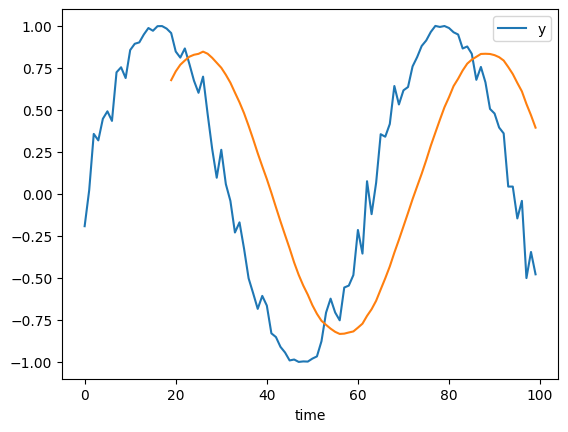

In [239]:
df.plot(x='time', y='y')
df.rolling(window=20)['y'].mean().plot(x='time');

Максимальное

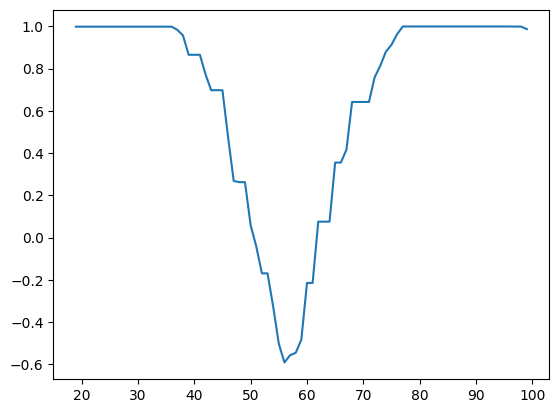

In [241]:
df.rolling(window=20)['y'].max().plot(x='time');

## `cut` и `qcut`

In [268]:
df = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 3,
                      'B': ['A', 'B', 'C'] * 4,
                       'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                       'D': np.random.randn(12),
                       'E': np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,-0.876066,-0.415593
1,one,B,foo,-0.621055,-0.918032
2,two,C,foo,0.038197,-0.999143
3,three,A,bar,0.678267,0.571884
4,one,B,bar,1.658849,-1.194104
5,one,C,bar,1.023320,-1.372147
6,two,A,foo,1.143949,1.809211
7,three,B,foo,-1.374847,2.006744
8,one,C,foo,0.461270,-0.332937
9,one,A,bar,0.374419,1.084695


`cut` стандартное разбиение

In [269]:
df['interval_D'] = pd.cut(df['D'], 5)
df

,A,B,C,D,E,interval_D
0,one,A,foo,-0.876066,-0.415593,"(-1.378, -0.768]"
1,one,B,foo,-0.621055,-0.918032,"(-0.768, -0.161]"
2,two,C,foo,0.038197,-0.999143,"(-0.161, 0.445]"
3,three,A,bar,0.678267,0.571884,"(0.445, 1.052]"
4,one,B,bar,1.658849,-1.194104,"(1.052, 1.659]"
5,one,C,bar,1.023320,-1.372147,"(0.445, 1.052]"
6,two,A,foo,1.143949,1.809211,"(1.052, 1.659]"
7,three,B,foo,-1.374847,2.006744,"(-1.378, -0.768]"
8,one,C,foo,0.461270,-0.332937,"(0.445, 1.052]"
9,one,A,bar,0.374419,1.084695,"(-0.161, 0.445]"


`cut` нестандартное разбиение

In [270]:
df['interval_D'] = pd.cut(df['D'], 5, labels=['first', 'second', 'thrid', 'fourth', 'fifth'])
df

,A,B,C,D,E,interval_D
0,one,A,foo,-0.876066,-0.415593,first
1,one,B,foo,-0.621055,-0.918032,second
2,two,C,foo,0.038197,-0.999143,thrid
3,three,A,bar,0.678267,0.571884,fourth
4,one,B,bar,1.658849,-1.194104,fifth
5,one,C,bar,1.023320,-1.372147,fourth
6,two,A,foo,1.143949,1.809211,fifth
7,three,B,foo,-1.374847,2.006744,first
8,one,C,foo,0.461270,-0.332937,fourth
9,one,A,bar,0.374419,1.084695,thrid


`qcut`

In [272]:
pd.qcut(df['D'], [0, 0.25, 0.5, 0.75, 1.0], labels=['q1', 'q2', 'q3', 'q4'])

0     q1
1     q1
2     q2
3     q3
4     q4
5     q4
6     q4
7     q1
8     q3
9     q3
10    q2
11    q2
Name: D, dtype: category
Categories (4, object): ['q1' < 'q2' < 'q3' < 'q4']